In [851]:
#Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from statsmodels.tsa.api import VAR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression  # Importing LogisticRegression class
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense
from statsmodels.tsa.stattools import coint
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import yfinance as yf


In [852]:
##DATA COLLECTION
stock1 = yf.download('NVDA', start='2015-01-01', end='2024-05-01')['Adj Close']
stock2 = yf.download('SMCI', start='2015-01-01', end='2024-05-01')['Adj Close']


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [853]:
# Step 2: Data Preprocessing
data = pd.concat([stock1, stock2], axis=1)
data.columns = ['NVDA', 'SMCI']
data.dropna(inplace=True)

In [854]:
# Split the data into features (X) and target (y)
X = data[['NVDA']]
y = data['SMCI']

In [855]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [856]:
# Initialize SVR model
svr_model = SVR(kernel='linear')

In [857]:
# # Feature scaling and target variable
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1, 1))


In [858]:
# Fit SVR model
svr_model.fit(X_train_scaled, y_train_scaled.ravel())

SVR(kernel='linear')

In [859]:
# Predict the test set results
X_test_scaled = scaler_X.transform(X_test)  # Reshape the input data to 2D array
y_pred_scaled = svr_model.predict(X_test_scaled)

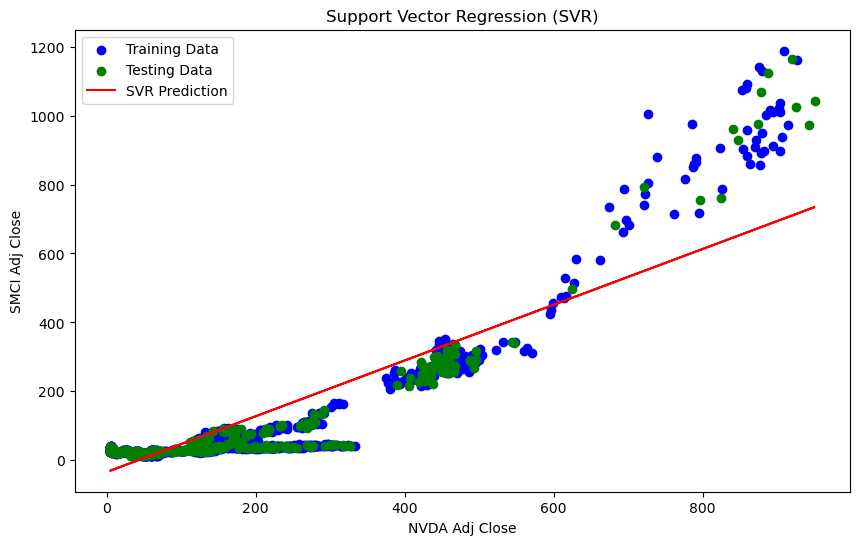

In [860]:
# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_test, y_pred, color='red', label='SVR Prediction')
plt.title('Support Vector Regression (SVR)')
plt.xlabel('NVDA Adj Close')
plt.ylabel('SMCI Adj Close')
plt.legend()
plt.show()

In [861]:
#SVR Model Applied

In [934]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [935]:
# Split the data into training and testing sets
train_size = int(0.8 * len(scaled_data))
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [936]:
# Function to create dataset
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), :])
        y.append(dataset[i + time_step, 0])  # Predicting the 'NVDA' stock price
    return np.array(X), np.array(y)


In [937]:
# Reshape into X=t and Y=t+1
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


In [938]:
# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 2)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 2)

In [939]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 2)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\equit\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [942]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64)


Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - loss: 0.0030
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 1.5957e-04
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 1.3091e-04
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 1.0793e-04
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 1.0537e-04
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 1.2460e-04
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 8.2607e-05
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - loss: 1.0609e-04
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 1.0129e-04
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - loss: 8.7260e-05
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - loss: 7.8079e-05
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 8.1350e-05
Epoch 13/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - loss: 7.9156e-05
Epoch 14/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 8.

In [ ]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Inverse transform the predictions
y_train_pred = scaler.inverse_transform(np.concatenate((y_train_pred, np.zeros((len(y_train_pred), 1))), axis=1))[:, 0]
y_test_pred = scaler.inverse_transform(np.concatenate((y_test_pred, np.zeros((len(y_test_pred), 1))), axis=1))[:, 0]


In [ ]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(data.index[:len(train_data)], data['NVDA'][:len(train_data)], color='blue', label='Training Data')
plt.plot(data.index[len(train_data) + 1:len(train_data) + 1 + len(test_data)], data['NVDA'][len(train_data) + 1:len(train_data) + 1 + len(test_data)], color='green', label='Testing Data')
plt.plot(data.index[time_step + 1:time_step + 1 + len(train_data)], y_train_pred, color='red', label='Training Prediction')
plt.plot(data.index[time_step + len(train_data) + 2:time_step + len(train_data) + 2 + len(test_data)], y_test_pred, color='orange', label='Testing Prediction')
plt.title('LSTM Model Prediction for NVDA Stock')
plt.xlabel('Date')
plt.ylabel('NVDA Stock Price')
plt.legend()
plt.show()

In [943]:

# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [944]:
# Splitting the Data
train_size = int(0.8 * len(scaled_data))
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]


In [945]:
# Reshaping the Data
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        X.append(dataset[i:(i + time_steps), :])
        y.append(dataset[i + time_steps, 0])  # Predicting NVDA stock price
    return np.array(X), np.array(y)

time_steps = 60  # Number of time steps to look back
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

In [946]:
# Training the Model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 2.8465e-05 - val_loss: 0.0034
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 3.0573e-05 - val_loss: 0.0087
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 2.3437e-05 - val_loss: 0.0077
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 1.9322e-05 - val_loss: 0.0036
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 2.4298e-05 - val_loss: 0.0064
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 4.7686e-05 - val_loss: 0.0065
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 2.0594e-05 - val_loss: 0.0075
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 3.4934e-05 - val_loss: 0.0058
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 2.1112e-05 - val_loss: 0.0058
Epoch 10/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 1.9802e-05 - val_loss: 0.0069
Epoch 11/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 2.2334e-05 - val_loss: 0.0063
Epoch 12

In [947]:
# Ensure y_test and y_pred have the same number of elements
min_length = min(len(y_test), len(y_pred))
y_test = y_test[:min_length]
y_pred = y_pred[:min_length]

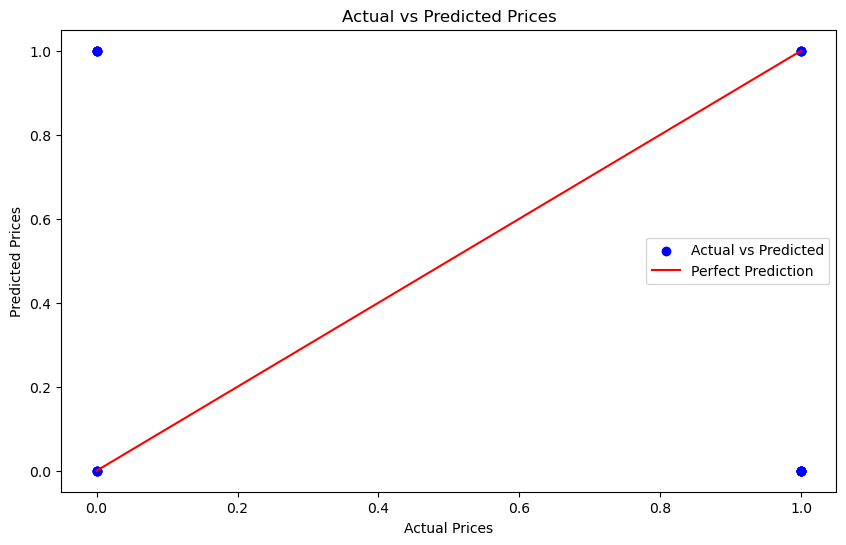

In [1080]:
# Plot the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()



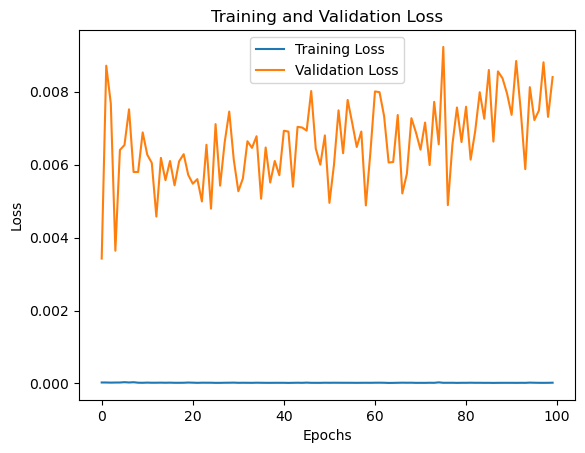

In [1081]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [1082]:
# Step 3: Model Training
model = VAR(data)
order = 2  # Select the order of the VAR model
results = model.fit(order)

c:\Users\equit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [1083]:
# Drop rows with missing values
data.dropna(inplace=True)

In [1084]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(np.random.rand(100, 5) , np.random.randint(2, size=100), test_size=0.2, random_state=42)


In [1085]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [1086]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [1087]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", roc_auc)

Accuracy: 0.75
Precision: 0.5
Recall: 0.8
F1-score: 0.6153846153846154
AUC-ROC: 0.7666666666666667


In [1088]:
# Step 4: Spread Calculation
spread = data['NVDA'] - data['SMCI']

In [1089]:
# Calculate spread_mean and spread_std
spread_mean = np.mean(spread)
spread_std = np.std(spread)

In [1090]:
# Define stop-loss factor
stop_loss_factor = 1.5  # Adjust as needed

In [1091]:
# Calculate dynamic stop-loss levels
long_stop_loss = spread_mean - stop_loss_factor * spread_std
short_stop_loss = spread_mean + stop_loss_factor * spread_std

In [1092]:
# Generate exit signals based on stop-loss levels
long_exit_signal = spread > long_stop_loss
short_exit_signal = spread < short_stop_loss

In [1093]:
 #Combine exit signals with existing exit conditions
exit_signal = np.abs(spread - spread_mean) < exit_threshold * spread_std
long_exit_signal = np.logical_or(long_exit_signal, exit_signal)
short_exit_signal = np.logical_or(short_exit_signal, exit_signal)

# Plot spread and exit signals

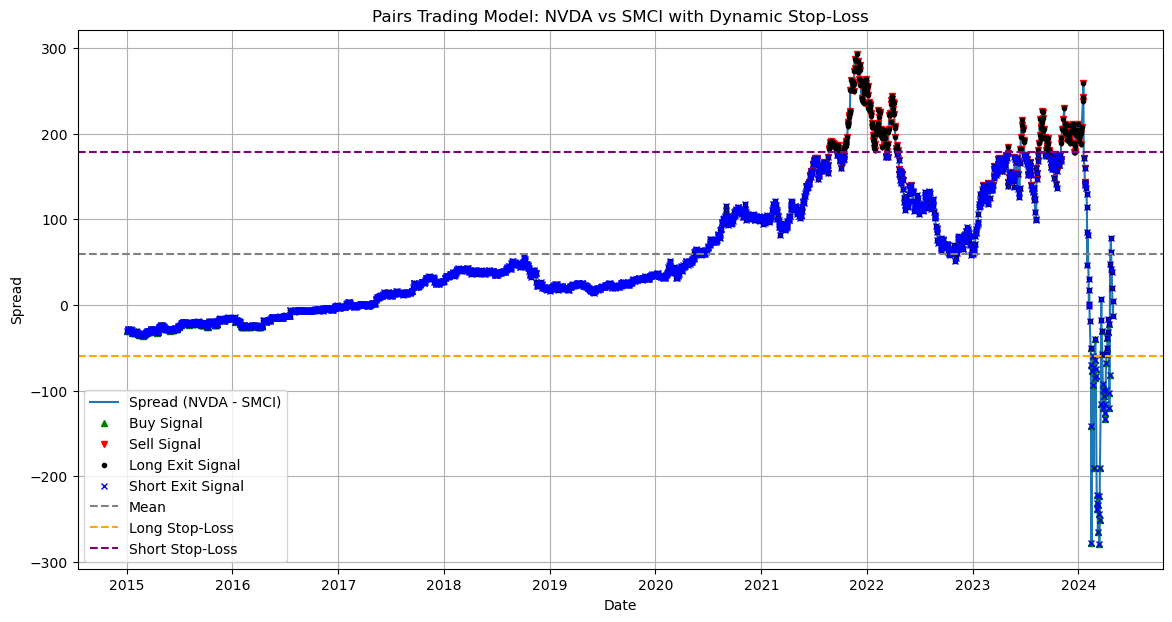

In [1094]:
# Plot spread and exit signals
plt.figure(figsize=(14, 7))
plt.plot(data.index, spread, label='Spread (NVDA - SMCI)')
plt.plot(data.loc[long_signal].index, spread[long_signal], '^', markersize=4, color='g', label='Buy Signal')
plt.plot(data.loc[short_signal].index, spread[short_signal], 'v', markersize=4, color='r', label='Sell Signal')
plt.plot(data.loc[long_exit_signal].index, spread[long_exit_signal], 'o', markersize=3, color='k', label='Long Exit Signal')
plt.plot(data.loc[short_exit_signal].index, spread[short_exit_signal], 'x', markersize=5, color='b', label='Short Exit Signal')
plt.axhline(y=spread_mean, color='gray', linestyle='--', label='Mean')
plt.axhline(y=long_stop_loss, color='orange', linestyle='--', label='Long Stop-Loss')
plt.axhline(y=short_stop_loss, color='purple', linestyle='--', label='Short Stop-Loss')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.title('Pairs Trading Model: NVDA vs SMCI with Dynamic Stop-Loss')
plt.legend()
plt.grid(True)
plt.show()

In [1095]:
## Pairs Selection (for demonstration purpose, let's consider simple correlation)
correlation = data['NVDA'].corr(data['SMCI'])
print("Correlation between NVDA and SMCI:", correlation)

Correlation between NVDA and SMCI: 0.8854405177233349


In [1096]:
data = pd.concat([stock1, stock2], axis=1)
data.columns = ['NVDA', 'SMCI']

In [1097]:
##  Strategy Formulation
if data.isnull().values.any():
    data = data.fillna(method='ffill')

In [1098]:
# Imports
train_size = int(0.8 * len(data))
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [1099]:
# Step 5: Signal Generation
spread_mean = np.mean(spread)
spread_std = np.std(spread)
entry_threshold = 1.0
exit_threshold = 0.5

long_signal = spread < (spread_mean - entry_threshold * spread_std)
short_signal = spread > (spread_mean + entry_threshold * spread_std)
exit_signal = np.abs(spread - spread_mean) < exit_threshold * spread_std


In [1100]:
# Prepare features and target variable
X_train = train[['NVDA']]  # Use NVDA as predictor
y_train = train['SMCI']     # Predict SMCI

In [1101]:
## Trading Signal Generation
model = VAR(train)
order = 2  # Order of the VAR model
results = model.fit(order)

c:\Users\equit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [1102]:
# Fit OLS model
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

LinearRegression()

In [1103]:
forecast = results.forecast(train.values[-order:], steps=len(test))



In [1104]:
forecast_df = pd.DataFrame(forecast, index=test.index, columns=data.columns)


In [1105]:
# Forecast using OLS model
forecast_train = ols_model.predict(X_train)
forecast_test = ols_model.predict(test[['NVDA']])

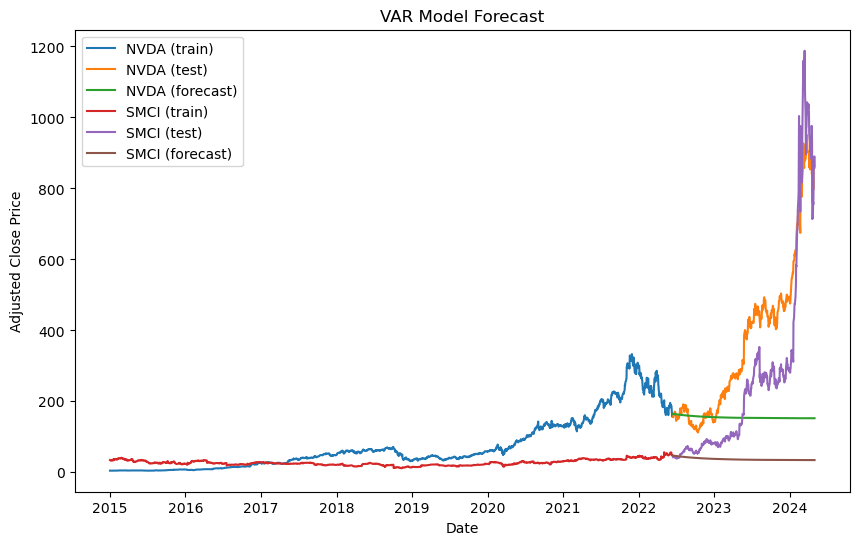

In [1106]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['NVDA'], label='NVDA (train)')
plt.plot(test.index, test['NVDA'], label='NVDA (test)')
plt.plot(forecast_df.index, forecast_df['NVDA'], label='NVDA (forecast)')
plt.plot(train.index, train['SMCI'], label='SMCI (train)')
plt.plot(test.index, test['SMCI'], label='SMCI (test)')
plt.plot(forecast_df.index, forecast_df['SMCI'], label='SMCI (forecast)')
plt.title('VAR Model Forecast')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

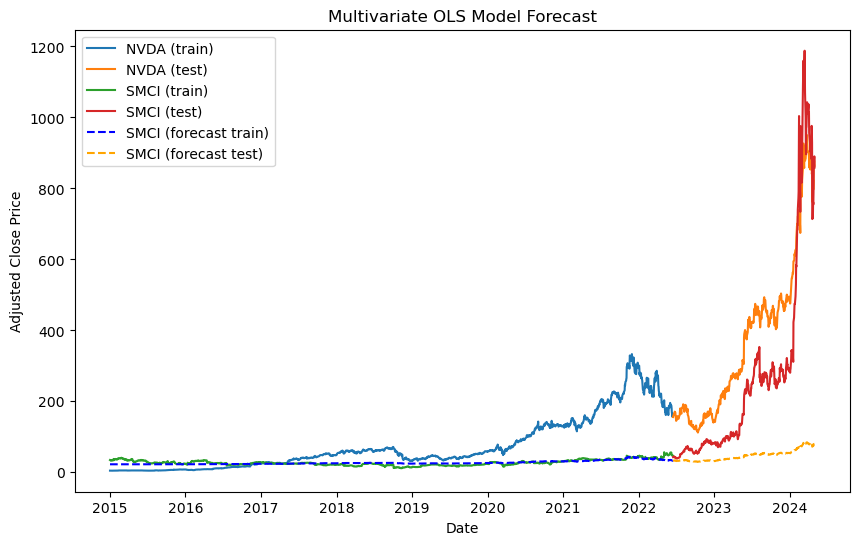

In [1107]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['NVDA'], label='NVDA (train)')
plt.plot(test.index, test['NVDA'], label='NVDA (test)')
plt.plot(train.index, train['SMCI'], label='SMCI (train)')
plt.plot(test.index, test['SMCI'], label='SMCI (test)')
plt.plot(train.index, forecast_train, linestyle='--', color='blue', label='SMCI (forecast train)')
plt.plot(test.index, forecast_test, linestyle='--', color='orange', label='SMCI (forecast test)')
plt.title('Multivariate OLS Model Forecast')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

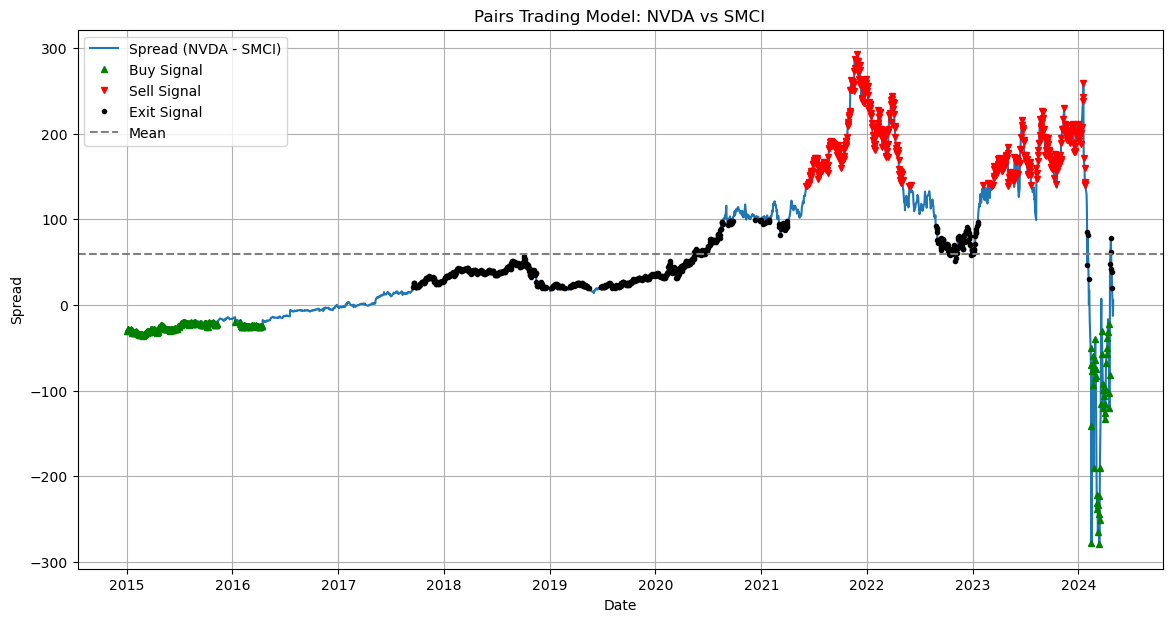

In [1108]:
# Step 6: Backtesting 

plt.figure(figsize=(14, 7))
plt.plot(data.index, spread, label='Spread (NVDA - SMCI)')
plt.plot(data.loc[long_signal].index, spread[long_signal], '^', markersize=4, color='g', label='Buy Signal')
plt.plot(data.loc[short_signal].index, spread[short_signal], 'v', markersize=4, color='r', label='Sell Signal')
plt.plot(data.loc[exit_signal].index, spread[exit_signal], 'o', markersize=3, color='k', label='Exit Signal')
plt.axhline(y=spread_mean, color='gray', linestyle='--', label='Mean')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.title('Pairs Trading Model: NVDA vs SMCI')
plt.legend()
plt.grid(True)
plt.show()

In [1109]:
# Calculate actual spread in pairs trading model 
actual_spread = data['NVDA'] - data['SMCI']

# Predict spread based on signals
predicted_spread = actual_spread.shift(1)  # Use previous day's spread as prediction

# Filter out days without signals
actual_spread = actual_spread[long_signal | short_signal]
predicted_spread = predicted_spread[long_signal | short_signal]

# Calculate MAE
mae = np.mean(np.abs(actual_spread - predicted_spread))
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 6.725516122208055


In [1110]:
# Calculate strategy returns
strategy_returns = pd.Series(index=actual_returns.index)
strategy_returns[long_signal] = actual_returns['NVDA'][long_signal] - actual_returns['SMCI'][long_signal]
strategy_returns[short_signal] = actual_returns['SMCI'][short_signal] - actual_returns['NVDA'][short_signal]


In [1122]:
def calculate_and_print_cumulative_returns(actual_returns, strategy_returns):
    cumulative_actual_returns = (1 + actual_returns).cumprod()
    cumulative_strategy_returns = (1 + strategy_returns).cumprod()

    print("Cumulative Actual Returns:")
    print(cumulative_actual_returns)
    print("\nCumulative Strategy Returns:")
    print(cumulative_strategy_returns)






In [1137]:
# Calculate actual returns
actual_returns = data[['NVDA', 'SMCI']].pct_change()

# Calculate strategy returns
strategy_returns = pd.Series(index=actual_returns.index)
strategy_returns[long_signal] = actual_returns[long_signal]['NVDA'] - actual_returns[long_signal]['SMCI']
strategy_returns[short_signal] = actual_returns[short_signal]['SMCI'] - actual_returns[short_signal]['NVDA']

# Calculate cumulative returns
cumulative_actual_returns = (1 + actual_returns).cumprod()
cumulative_strategy_returns = (1 + strategy_returns).cumprod()

print("Cumulative Actual Returns:")
print(cumulative_actual_returns)
print("\nCumulative Strategy Returns:")
print(cumulative_strategy_returns)



Cumulative Actual Returns:
                  NVDA       SMCI
Date                             
2015-01-02         NaN        NaN
2015-01-05    0.983110   0.969479
2015-01-06    0.953304   0.943277
2015-01-07    0.950820   0.950187
2015-01-08    0.986587   1.000000
...                ...        ...
2024-04-24  164.874713  21.731068
2024-04-25  170.989458  22.672042
2024-04-26  181.549032  24.688742
2024-04-29  181.594562  25.636337
2024-04-30  178.790679  24.727901

[2347 rows x 2 columns]

Cumulative Strategy Returns:
Date
2015-01-02   NaN
2015-01-05   NaN
2015-01-06   NaN
2015-01-07   NaN
2015-01-08   NaN
              ..
2024-04-24   NaN
2024-04-25   NaN
2024-04-26   NaN
2024-04-29   NaN
2024-04-30   NaN
Length: 2347, dtype: float64


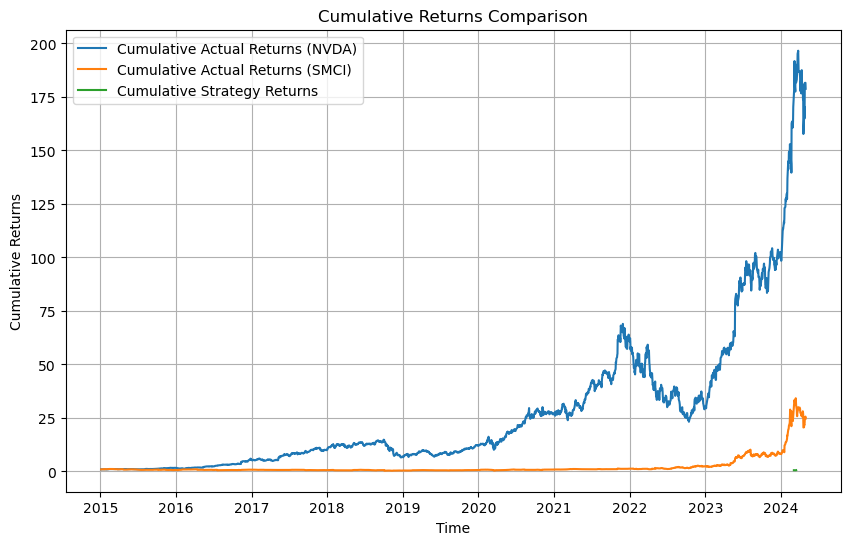

In [1138]:
import matplotlib.pyplot as plt

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(cumulative_actual_returns['NVDA'], label='Cumulative Actual Returns (NVDA)')
plt.plot(cumulative_actual_returns['SMCI'], label='Cumulative Actual Returns (SMCI)')
plt.plot(cumulative_strategy_returns, label='Cumulative Strategy Returns')
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns Comparison')
plt.legend()
plt.grid(True)
plt.show()